# **Simulasi data DBD dengan model SIR**


In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import odeint
import plotly.graph_objects as go

# Load data from an Excel file
data = pd.read_excel('/content/dbd.xlsx')  # Adjust the file path as necessary

# Extract year and number of dengue fever cases
tahun = data['TAHUN'].values
jumlah_penderita = data['DBD'].values

# Assume the total population of the region
total_populasi = 47379389  # This should be adjusted if you have specific data

# SIR model function
def model_SIR(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Objective function to minimize the mean squared error between model predictions and actual data
def MSE_model(params):
    beta, gamma = params
    sol = odeint(model_SIR, [total_populasi - jumlah_penderita[0] - 1, 1, 0], np.arange(len(tahun)), args=(beta, gamma))
    prediksi_penderita = sol[:, 1]  # Infected compartment
    mse = np.mean((prediksi_penderita - jumlah_penderita) ** 2)
    return mse

# Initial guesses for the parameters
tebakan_parameter = [0.5, 0.1]

# Optimize parameters using the minimize function
params_opt = minimize(MSE_model, tebakan_parameter, bounds=[(0, 1), (0, 1)], method='L-BFGS-B').x

# SIR model solution with optimized parameters
sol = odeint(model_SIR, [total_populasi - jumlah_penderita[0] - 1, 1, 0], np.arange(len(tahun)), args=(params_opt[0], params_opt[1]))

# Plot the fitting results of the model against actual data
fig = go.Figure()
fig.add_trace(go.Scatter(x=tahun, y=jumlah_penderita, mode='lines', name='Model Predictions'))
fig.add_trace(go.Scatter(x=tahun, y=jumlah_penderita, mode='markers', name='Actual Data'))
fig.update_layout(
    title='Fitting Model terhadap Data Penderita DBD di Jawa Barat',
    xaxis_title='Year',
    yaxis_title='Number of Dengue Cases',
    xaxis=dict(
        tickmode='linear',
        tick0=min(tahun),
        dtick=1  # Set dtick to 1 to ensure every year is marked
    ),
    template='plotly_white'
)
fig.show()


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning:

Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.



# **Grafik Solusi Model SIR Dengan Vaksinasi**







In [5]:
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go

# Parameters
N = 2545005  # Total populasi Kota Bandung
mu = 0.0135  # Tingkat kematian alami
Lambda = mu * N  # Laju recruitment
beta = 0.5  # Parameter penyebaran DBD
gamma = 0.06  # Parameter kesembuhan
k = 0.002  # Parameter kehilangan kekebalan
v_without_vaccine = 0  # Tanpa vaksinasi
v_with_vaccine = 0.7  # Dengan vaksinasi

# Initial conditions
S0 = N  # Semua individu awalnya rentan
I0 = 1  # Jumlah awal individu terinfeksi
R0 = 0  # Jumlah awal individu pulih
V0 = N * v_with_vaccine  # Jumlah awal individu yang divaksinasi

# Model SIR without vaccination
def model_without_vaccine(y, t):
    S, I, R, V = y
    dSdt = mu * N - (beta * S * I) / N - mu * S
    dIdt = (beta * S * I) / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dVdt = 0
    return [dSdt, dIdt, dRdt, dVdt]

# Model SIR with vaccination
def model_with_vaccine(y, t):
    S, I, R, V = y
    dSdt = mu * N - (beta * S * I) / N - mu * S - v_with_vaccine * mu * S
    dIdt = (beta * S * I) / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dVdt = v_with_vaccine * mu * S
    return [dSdt, dIdt, dRdt, dVdt]

# Time vector
t = np.linspace(0, 365, 365)  # Satu tahun

# Solve models
sol_without_vaccine = odeint(model_without_vaccine, [S0, I0, R0, 0], t)
sol_with_vaccine = odeint(model_with_vaccine, [S0, I0, R0, V0], t)

# Plot results
fig = go.Figure()


# Plotting with vaccination
fig.add_trace(go.Scatter(x=t, y=sol_with_vaccine[:, 0], mode='lines', name='Susceptible (with vaccine)'))
fig.add_trace(go.Scatter(x=t, y=sol_with_vaccine[:, 1], mode='lines', name='Infected (with vaccine)'))
fig.add_trace(go.Scatter(x=t, y=sol_with_vaccine[:, 2], mode='lines', name='Recovered (with vaccine)'))
fig.add_trace(go.Scatter(x=t, y=sol_with_vaccine[:, 3], mode='lines', name='Vaccinated'))

# Update layout
fig.update_layout(
    title='SIR Model Dengan Vaksin',
    xaxis_title='Time (Hari)',
    yaxis_title='Population',
    template='plotly_white'
)

fig.show()


# **Pengecekan pembentukan pola potrait pase apakah sesuai dengan algoritma  Model SIR Dengan Vaksinasi diatas**



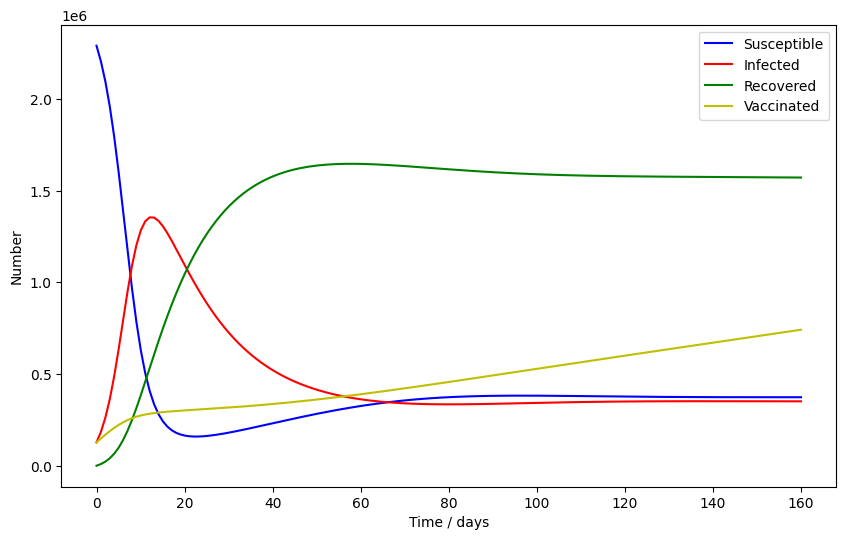

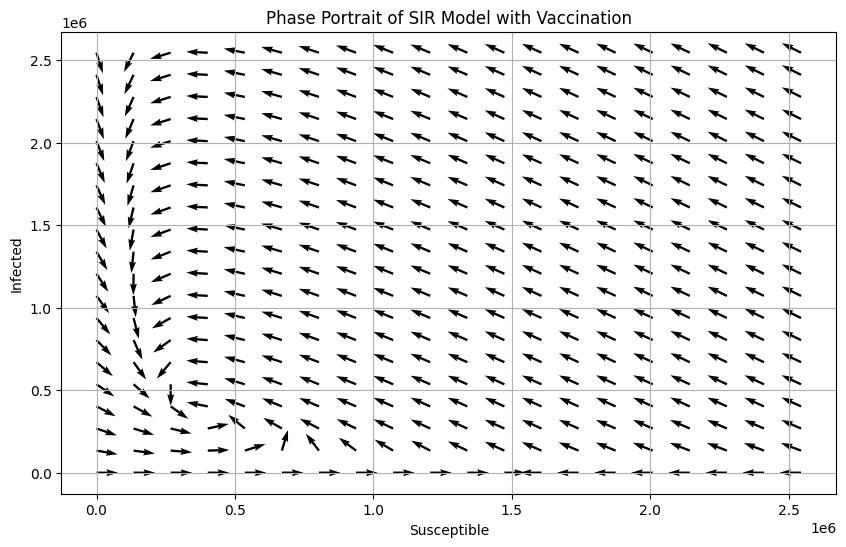

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters for the SIR model
beta = 0.5     # Infection rate
gamma = 0.06   # Recovery rate
mu = 0.0135    # Natural death rate
v = 0.7        # Vaccination rate
N = 2545005    # Total population

# Define the SIR model with vaccination
def model_with_vaccine(y, t):
    S, I, R, V = y
    dSdt = mu * N - (beta * S * I) / N - mu * S - v * mu * S
    dIdt = (beta * S * I) / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dVdt = v * mu * S
    return [dSdt, dIdt, dRdt, dVdt]

# Initial conditions
initial_S = 0.9 * N  # 90% susceptible
initial_I = 0.05 * N  # 5% infected
initial_R = 0        # 0% recovered
initial_V = 0.05 * N  # 5% vaccinated
initial_conditions = [initial_S, initial_I, initial_R, initial_V]

# Time vector
t = np.linspace(0, 160, 160)

# Integrate the SIR equations over the time grid, t.
solution = odeint(model_with_vaccine, initial_conditions, t)
S, I, R, V = solution.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.plot(t, V, 'y', label='Vaccinated')
plt.xlabel('Time / days')
plt.ylabel('Number')
plt.legend()
plt.show()

# Phase portrait with quiver plot

# Generate grid for quiver plot
S_range = np.linspace(0, N, 20)
I_range = np.linspace(0, N, 20)
S, I = np.meshgrid(S_range, I_range)

# Compute derivatives for quiver plot
dSdt = mu * N - (beta * S * I) / N - mu * S - v * mu * S
dIdt = (beta * S * I) / N - gamma * I - mu * I

# Normalize the vectors for quiver plot
M = np.hypot(dSdt, dIdt)
M[M == 0] = 1
dSdt /= M
dIdt /= M

plt.figure(figsize=(10, 6))
plt.quiver(S, I, dSdt, dIdt, angles='xy')
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.title('Phase Portrait of SIR Model with Vaccination')
plt.grid()
plt.show()


# **Setelah pengecekan sesuai kita bikin lah garis pada polanya apa namanya ndatau aku ikutin penjelasan youtube ajalah**



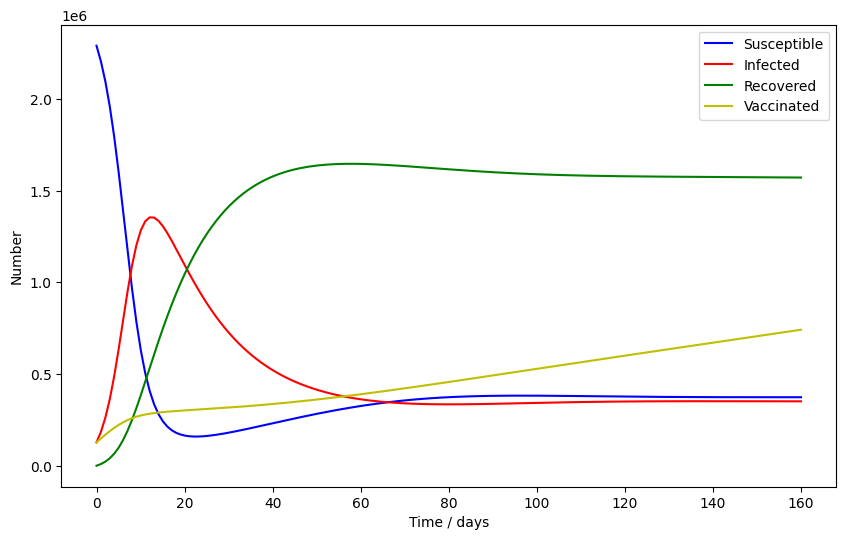

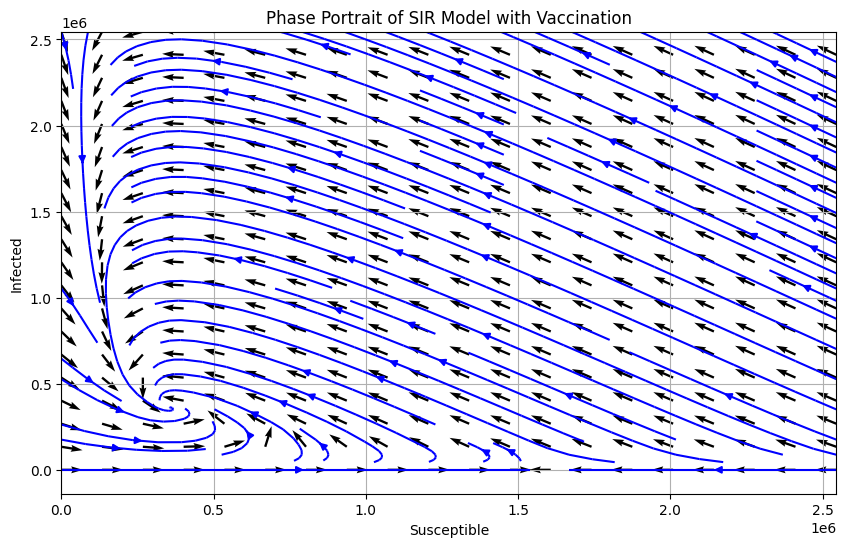

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters for the SIR model
beta = 0.5     # Infection rate
gamma = 0.06   # Recovery rate
mu = 0.0135    # Natural death rate
v = 0.7        # Vaccination rate
N = 2545005    # Total population

# Define the SIR model with vaccination
def model_with_vaccine(y, t):
    S, I, R, V = y
    dSdt = mu * N - (beta * S * I) / N - mu * S - v * mu * S
    dIdt = (beta * S * I) / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dVdt = v * mu * S
    return [dSdt, dIdt, dRdt, dVdt]

# Initial conditions
initial_S = 0.9 * N  # 90% susceptible
initial_I = 0.05 * N  # 5% infected
initial_R = 0        # 0% recovered
initial_V = 0.05 * N  # 5% vaccinated
initial_conditions = [initial_S, initial_I, initial_R, initial_V]

# Time vector
t = np.linspace(0, 160, 160)

# Integrate the SIR equations over the time grid, t.
solution = odeint(model_with_vaccine, initial_conditions, t)
S, I, R, V = solution.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.plot(t, V, 'y', label='Vaccinated')
plt.xlabel('Time / days')
plt.ylabel('Number')
plt.legend()
plt.show()

# Phase portrait with quiver plot

# Generate grid for quiver plot
S_range = np.linspace(0, N, 20)
I_range = np.linspace(0, N, 20)
S, I = np.meshgrid(S_range, I_range)

# Compute derivatives for quiver plot
dSdt = mu * N - (beta * S * I) / N - mu * S - v * mu * S
dIdt = (beta * S * I) / N - gamma * I - mu * I

# Normalize the vectors for quiver plot
M = np.hypot(dSdt, dIdt)
M[M == 0] = 1
dSdt /= M
dIdt /= M

plt.figure(figsize=(10, 6))
plt.quiver(S, I, dSdt, dIdt, angles='xy')
plt.streamplot(S, I, dSdt, dIdt, color='blue')
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.title('Phase Portrait of SIR Model with Vaccination')
plt.grid()
plt.show()


# **Bagaimana pendapatmu apakah benar atau salah????**



> call me  eza 082241569190



